<a href="https://colab.research.google.com/github/khan1652/AI/blob/main/ML_2%EC%B0%A8%EC%8B%9C_%ED%9A%8C%EA%B7%80(%EC%A4%91%EA%B3%A0%EC%B0%A8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('/content/hyundi_preprocessed.csv', index_col=0)

In [4]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,7,2017,7999,0,17307,0,145.0,58.9,1.2
1,12,2016,14499,2,25233,2,235.0,43.5,2.0
2,12,2016,11399,0,37877,2,30.0,61.7,1.7
3,5,2016,6499,0,23789,0,20.0,60.1,1.0
4,6,2015,10199,0,33177,2,160.0,51.4,2.0


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=df.drop(['transmission', 'fuelType', 'tax', 'mpg'], axis=1)

In [19]:
df

,model,year,price,mileage,engineSize
0,0.466667,0.85,7999,0.125407,0.105263
1,0.800000,0.80,14499,0.182842,0.526316
2,0.800000,0.80,11399,0.274466,0.368421
3,0.333333,0.80,6499,0.172378,0.000000
4,0.400000,0.75,10199,0.240408,0.526316
...,...,...,...,...,...
4854,1.000000,0.95,29995,0.011348,0.631579
4856,0.600000,0.75,7830,0.431213,0.368421
4857,0.333333,0.85,6830,0.100066,0.000000
4858,0.800000,0.90,13994,0.168929,0.315789


In [20]:
SCA_COL = ['model', 'year', 'mileage', 'engineSize']
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

Scaler = MinMaxScaler()

df[SCA_COL] = Scaler.fit_transform(df[SCA_COL])
df

,model,year,price,mileage,engineSize
0,0.466667,0.85,7999,0.125407,0.105263
1,0.800000,0.80,14499,0.182842,0.526316
2,0.800000,0.80,11399,0.274466,0.368421
3,0.333333,0.80,6499,0.172378,0.000000
4,0.400000,0.75,10199,0.240408,0.526316
...,...,...,...,...,...
4854,1.000000,0.95,29995,0.011348,0.631579
4856,0.600000,0.75,7830,0.431213,0.368421
4857,0.333333,0.85,6830,0.100066,0.000000
4858,0.800000,0.90,13994,0.168929,0.315789


In [21]:
df.describe()

,model,year,price,mileage,engineSize
count,4592.000000,4592.000000,4592.000000,4592.000000,4592.000000
mean,0.633145,0.857186,12840.655488,0.153203,0.248178
std,0.218228,0.095940,5907.108300,0.125783,0.200423
min,0.000000,0.000000,1200.000000,0.000000,0.000000
25%,0.400000,0.800000,8200.000000,0.060171,0.105263
50%,0.666667,0.850000,12058.500000,0.124403,0.315789
75%,0.800000,0.950000,15795.000000,0.221243,0.368421
max,1.000000,1.000000,43995.000000,1.000000,1.000000


In [22]:
y_data = df['price']
x_data = df.drop(columns='price')

In [23]:
y_data

0        7999
1       14499
2       11399
3        6499
4       10199
        ...  
4854    29995
4856     7830
4857     6830
4858    13994
4859    15999
Name: price, Length: 4592, dtype: int64

In [24]:
x_data

,model,year,mileage,engineSize
0,0.466667,0.85,0.125407,0.105263
1,0.800000,0.80,0.182842,0.526316
2,0.800000,0.80,0.274466,0.368421
3,0.333333,0.80,0.172378,0.000000
4,0.400000,0.75,0.240408,0.526316
...,...,...,...,...
4854,1.000000,0.95,0.011348,0.631579
4856,0.600000,0.75,0.431213,0.368421
4857,0.333333,0.85,0.100066,0.000000
4858,0.800000,0.90,0.168929,0.315789


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=1)

In [26]:
len(X_train), len(X_test), len(y_train), len(y_test)

(3214, 1378, 3214, 1378)

In [27]:
from sklearn.linear_model import LinearRegression
modelLR = LinearRegression()
modelLR.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred_LR = modelLR.predict(X_test)

In [29]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [30]:
dfLR = pd.DataFrame({'선형회귀분석 r2_score':r2_score(y_test, y_pred_LR),
                    '선형회귀분석 MAE':mean_absolute_error(y_test, y_pred_LR),
                    '선형회귀분석 MSE':mean_squared_error(y_test, y_pred_LR),
                    '선형회귀분석 RMSE':mean_squared_error(y_test, y_pred_LR)**0.5,
                    '선형회귀분석 MAPE':mean_absolute_percentage_error(y_test, y_pred_LR),
                    }, index=['Linear Regression'])
dfLR

,선형회귀분석 r2_score,선형회귀분석 MAE,선형회귀분석 MSE,선형회귀분석 RMSE,선형회귀분석 MAPE
Linear Regression,0.805012,1852.460519,7.134007e+06,2670.956118,0.158553


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


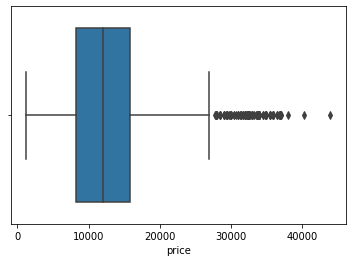

In [31]:
sns.boxplot(df['price'])